The following cells clean the diesel grid data from Sentani

- even minute boundaries
- remove kWh export data that is not increasing or constant

In [8]:
import pandas as pd
import csv_cleaner as cc

In [13]:
# clean up ajau.csv
raw_directory = '../Lake_Sentani/Diesel_Data/raw_data/'
clean_directory = '../Lake_Sentani/Diesel_Data/cleaned_data/'
filename = 'ajau.csv'

data = pd.read_csv(raw_directory + filename, index_col=0, parse_dates=True)

intermediate_data = data
intermediate_data = cc.truncate_dt_index_fractional_seconds(intermediate_data)
intermediate_data = cc.remove_duplicate_indices(intermediate_data)
intermediate_data = cc.remove_date_range(intermediate_data, dt_start='2015-04-22 16:15', dt_end='2015-04-22 18:23')

# write out to cleaned directory
intermediate_data.to_csv(clean_directory + filename)

In [14]:
# clean up asei.csv
raw_directory = '../Lake_Sentani/Diesel_Data/raw_data/'
clean_directory = '../Lake_Sentani/Diesel_Data/cleaned_data/'
filename = 'asei.csv'

data = pd.read_csv(raw_directory + filename, index_col=0, parse_dates=True)

intermediate_data = data
intermediate_data = cc.truncate_dt_index_fractional_seconds(intermediate_data)
intermediate_data = cc.remove_date_range(intermediate_data, dt_start='2015-04-22 16:55', dt_end='2015-04-22 17:45')
intermediate_data = cc.remove_duplicate_indices(intermediate_data)

# write out to cleaned directory
intermediate_data.to_csv(clean_directory + filename)

In [15]:
filenames = ['atamali.csv',  'ayapo.csv',  'kensio.csv']
for filename in filenames:
    data = pd.read_csv(raw_directory + filename, index_col=0, parse_dates=True)
    intermediate_data = data
    intermediate_data = cc.truncate_dt_index_fractional_seconds(intermediate_data)
    intermediate_data = cc.remove_duplicate_indices(intermediate_data)
    # write out to cleaned directory
    intermediate_data.to_csv(clean_directory + filename)

In [13]:
# look for even 00 seconds readings

import pandas as pd
input_directory = '../Lake_Sentani/Diesel_Data/'
data = pd.read_csv(input_directory + 'asei.csv', index_col=0, parse_dates=True)

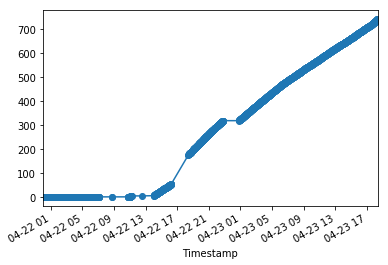

In [102]:
# visualize oscillations
%matplotlib inline
data = pd.read_csv(input_directory + 'ajau.csv', index_col=0, parse_dates=True)
# data['kWh export']['2015-04-22 16:16':'2015-04-22 18:23'].plot(marker='o')
#data['kWh export'].plot()

#data['2015-04-22 16:16']
#data.index[:'2015-04-22 18:23']
#decimated_data = data.drop(data['2015-04-22 16:15':'2015-04-22 18:23'])

intermediate_data = data
intermediate_data = truncate_dt_index_fractional_seconds(intermediate_data)

dt_start = '2015-04-22 16:15'
dt_end = '2015-04-22 18:23'
dates_for_removal = pd.date_range(start=dt_start, end=dt_end, freq='T')
decimated_data = intermediate_data.drop(dates_for_removal)


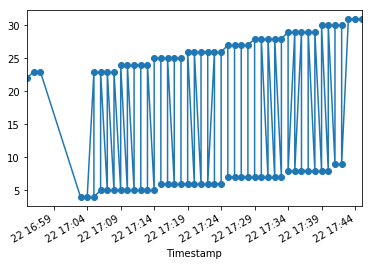

In [64]:
# visualize oscillations
%matplotlib inline
data = pd.read_csv(input_directory + 'asei.csv', index_col=0, parse_dates=True)
data['kWh export']['2015-04-22 16:55':'2015-04-22 17:45'].plot(marker='o')

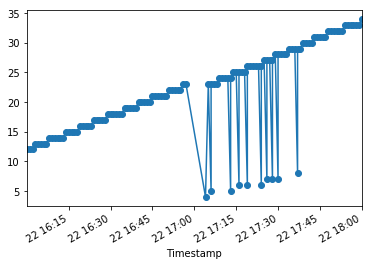

In [38]:
# technique 1 remove any data points with drop
data_diffs = data['kWh export'].diff(1)
data[data_diffs >= 0]['kWh export']['2015-04-22 16:00':'2015-04-22 18:00'].plot(marker='o')

In [0]:
# loop over files

# load individual file
# truncate fractional seconds
# remove duplicate datetime indices
# write out to cleaned directory
